# Kernel PCA
When the dataset is not linearly seperable, it is required to apply a transformation (kernel) for dimensionality reduction. Kernel PCA is used in such cases.

In [49]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [50]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Let's visualize the data to see if it is linearly seperable or not.

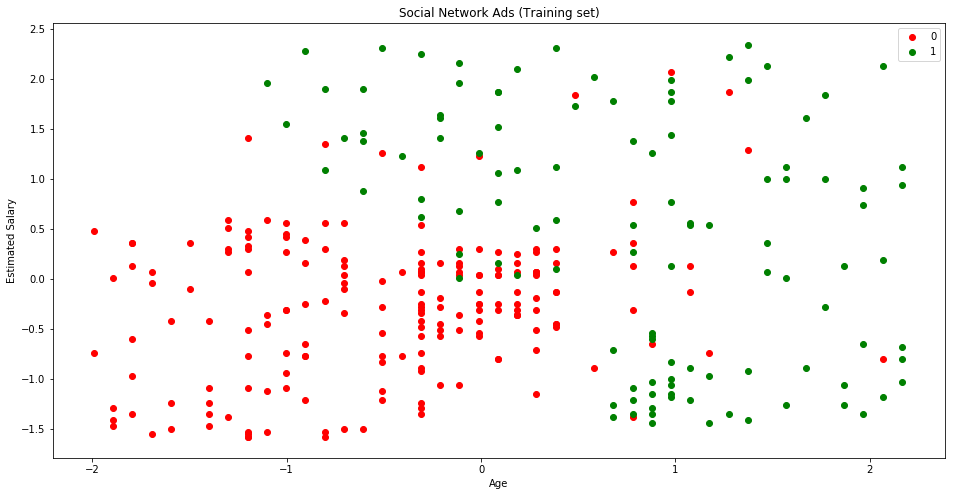

In [53]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
plt.figure(figsize=(16,8))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Social Network Ads (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Let's see what happens when we use a linear classifier such as Logistic Regression on this dataset. 

Confusion Matrix:
    0   1
0  65   3
1   8  24


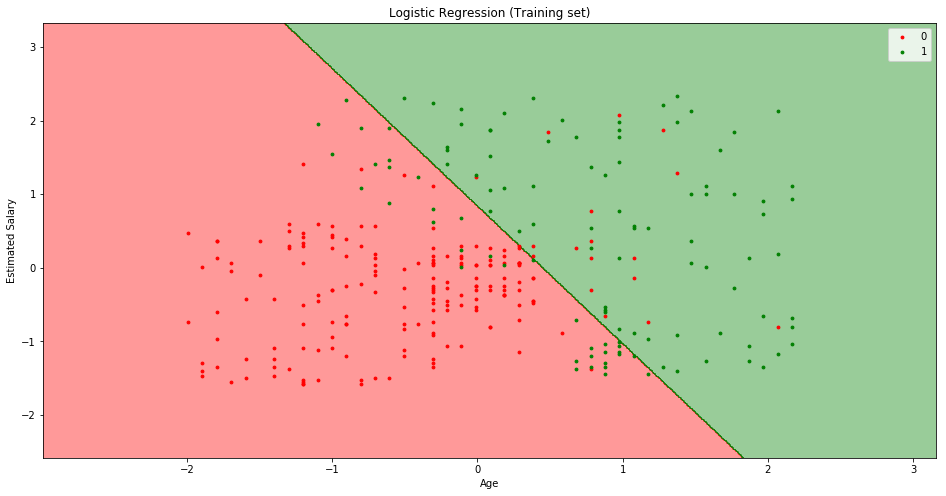

In [55]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(pd.DataFrame(cm))

# Visualising the Training set results
from matplotlib.colors import ListedColormap

def visualize(X,y):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    fig = plt.figure(figsize=(16,8))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.4, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j,s=8)
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    return

visualize(X_train,y_train)


Now, let's try Logistic Regression with applying Kernel PCA transformation.  
First we apply Gaussian kernel:

In [56]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_1 = kpca.fit_transform(X_train)
X_test_1 = kpca.transform(X_test)

Confusion Matrix:
    0   1
0  64   4
1   6  26


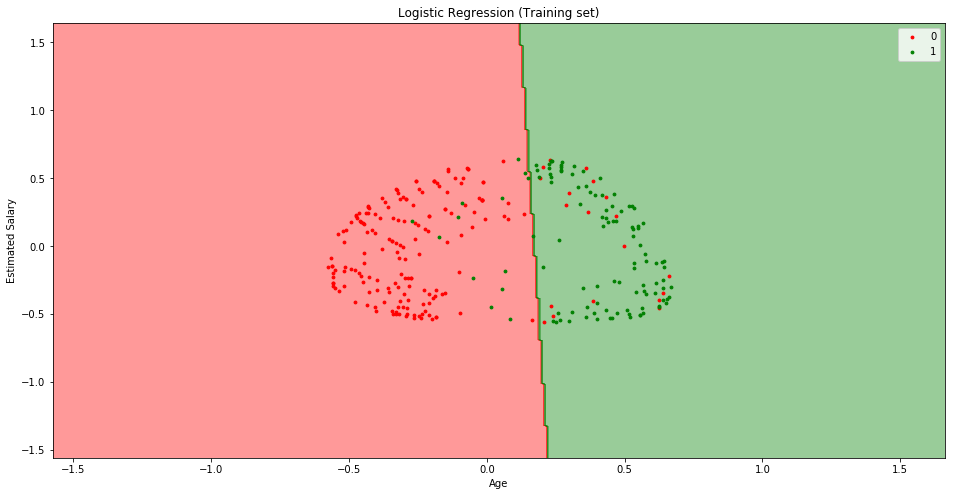

In [57]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_1, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_1)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(pd.DataFrame(cm))

# Visualising the Training set results
visualize(X_train_1,y_train)

We don't see any significant improvement in accuracy.  
Let's select another kernel and see how it performs on the dataset.  
This time we use a polynomial kernel:

In [41]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'poly')
X_train_2 = kpca.fit_transform(X_train)
X_test_2 = kpca.transform(X_test)

Confusion Matrix:
    0   1
0  66   2
1   7  25


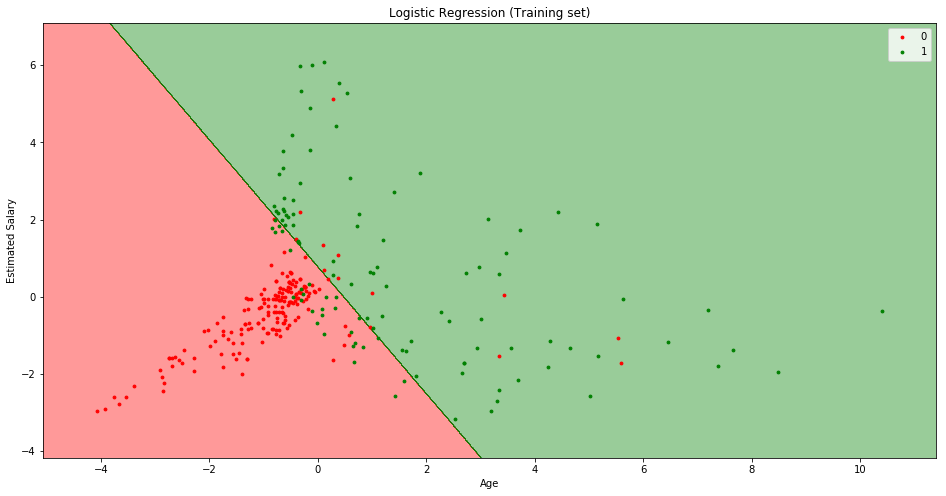

In [58]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_2, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_2)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(pd.DataFrame(cm))

# Visualising the Training set results
visualize(X_train_2,y_train)

Confusion Matrix:
    0   1
0  66   2
1   9  23


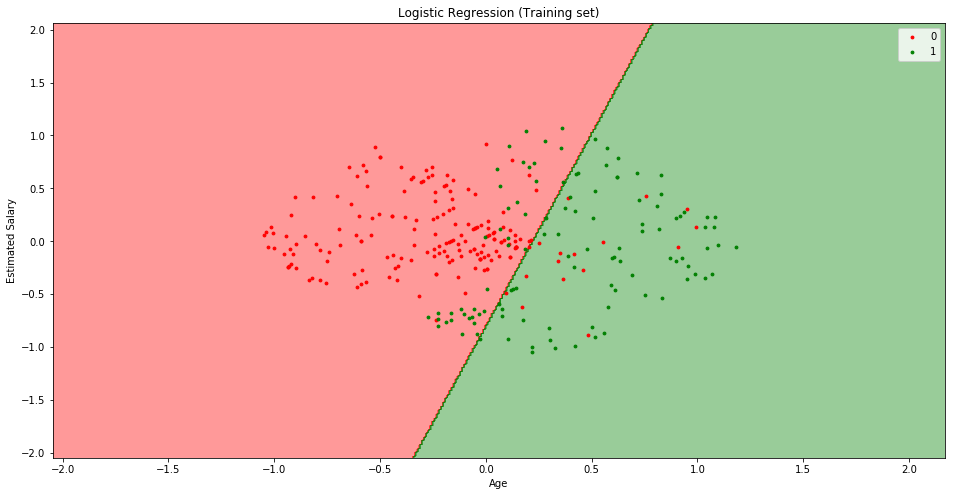

In [59]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'sigmoid')
X_train_3 = kpca.fit_transform(X_train)
X_test_3 = kpca.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_3, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_3)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(pd.DataFrame(cm))

# Visualising the Training set results
visualize(X_train_3,y_train)

Text(0.5,1,'Logistic Regression (Test set)\nSigmoid PCA')

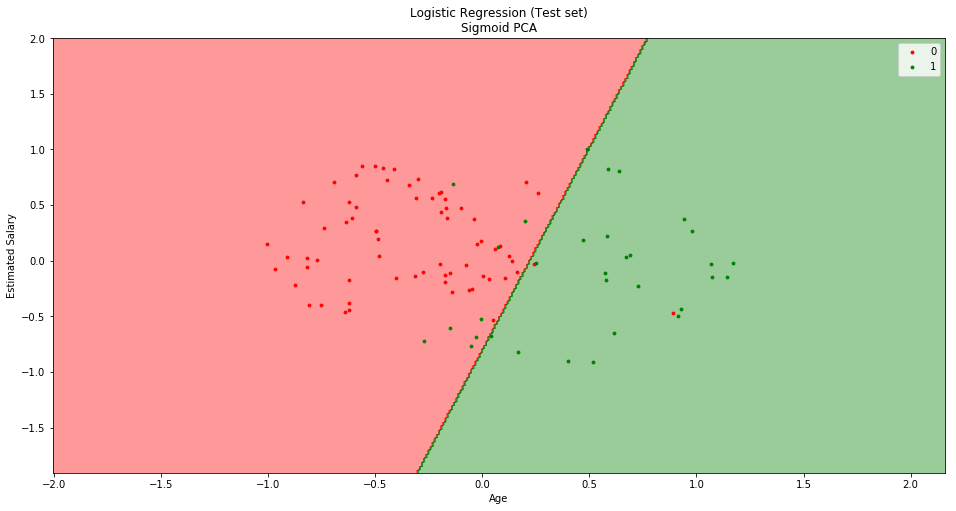

In [60]:
# Visualising the Test set results
visualize(X_test_3,y_test)
plt.title('Logistic Regression (Test set)\nSigmoid PCA')

### Conclusion:

Kernel PCA enables performing nonlinear transformations on your dataset.  
It is required to experiment with different kernels and gamma values to find best parameters that fit the  dataset.